In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
file_path = 'Ev Sales.csv'
df = pd.read_csv(file_path)


In [28]:
df.head()


,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


In [ ]:
df['Year_Only'] = df['YEAR'].dt.year

In [30]:
df.head()


,YEAR,2 W,3 W,4 W,BUS,TOTAL,Year_Only
0,2017-04-01,96,4748,198,0,5042,2017
1,2017-05-01,91,6720,215,2,7028,2017
2,2017-06-01,137,7178,149,1,7465,2017
3,2017-07-01,116,8775,120,0,9011,2017
4,2017-08-01,99,8905,137,0,9141,2017


In [31]:
df.isnull().sum()


YEAR         0
2 W          0
3 W          0
4 W          0
BUS          0
TOTAL        0
Year_Only    0
dtype: int64

In [ ]:
# to drop the null values if there were any


#df.dropna()


In [32]:
df.describe()

,YEAR,2 W,3 W,4 W,BUS,TOTAL,Year_Only
count,74,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2020-04-16 04:12:58.378378496,16938.729730,14851.351351,1272.567568,82.310811,33144.959459,2019.837838
min,2017-04-01 00:00:00,85.000000,668.000000,3.000000,0.000000,958.000000,2017.000000
25%,2018-10-08 18:00:00,1304.250000,7782.250000,187.750000,11.250000,9147.000000,2018.000000
50%,2020-04-16 00:00:00,3014.500000,10619.500000,317.500000,74.500000,14526.000000,2020.000000
75%,2021-10-24 06:00:00,23599.000000,18641.750000,1545.000000,113.500000,43902.750000,2021.000000
max,2023-05-01 00:00:00,105154.000000,45225.000000,8852.000000,331.000000,157788.000000,2023.000000
std,NaN,25846.636971,11002.517635,1841.195763,79.696672,38251.453387,1.828444


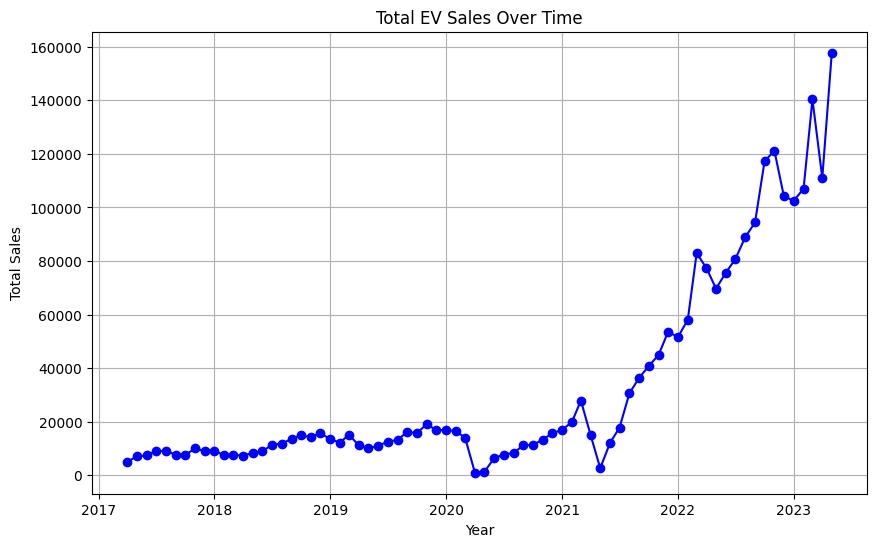

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['TOTAL'], marker='o', linestyle='-', color='b')
plt.title('Total EV Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

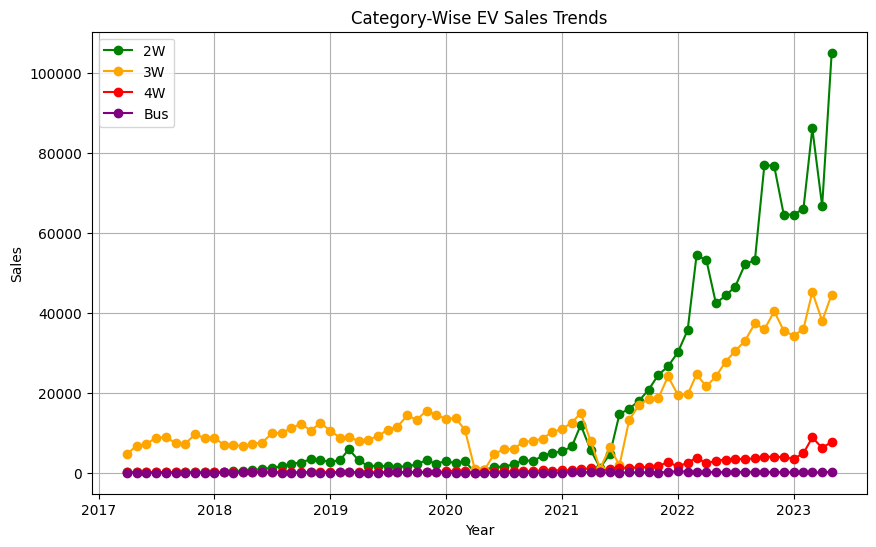

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['2 W'], marker='o', label='2W', linestyle='-', color='g')
plt.plot(df['YEAR'], df['3 W'], marker='o', label='3W', linestyle='-', color='orange')
plt.plot(df['YEAR'], df['4 W'], marker='o', label='4W', linestyle='-', color='r')
plt.plot(df['YEAR'], df['BUS'], marker='o', label='Bus', linestyle='-', color='purple')
plt.title('Category-Wise EV Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
yearly_sales = df.groupby('Year_Only').sum(numeric_only=True)

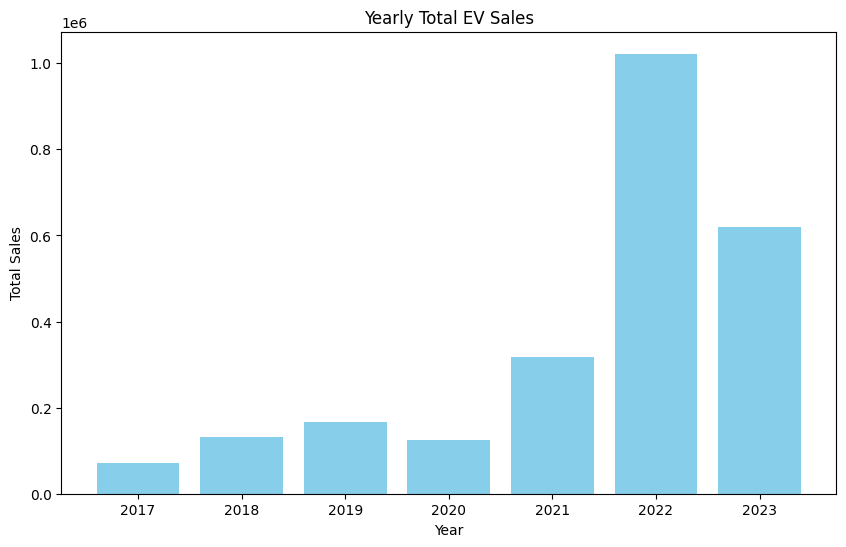

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales.index, yearly_sales['TOTAL'], color='skyblue')
plt.title('Yearly Total EV Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


In [37]:

df['Monthly_Growth'] = df['TOTAL'].pct_change() * 100


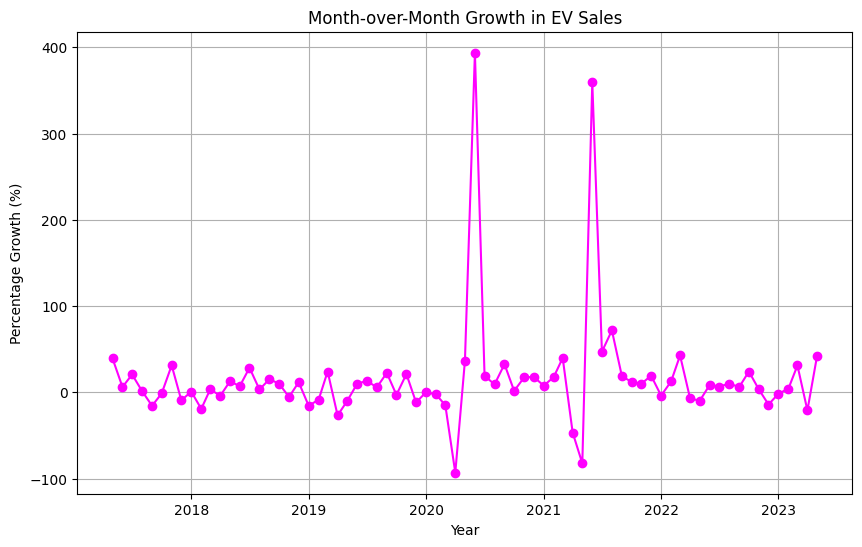

In [38]:

plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['Monthly_Growth'], marker='o', linestyle='-', color='magenta')
plt.title('Month-over-Month Growth in EV Sales')
plt.xlabel('Year')
plt.ylabel('Percentage Growth (%)')
plt.grid(True)
plt.show()

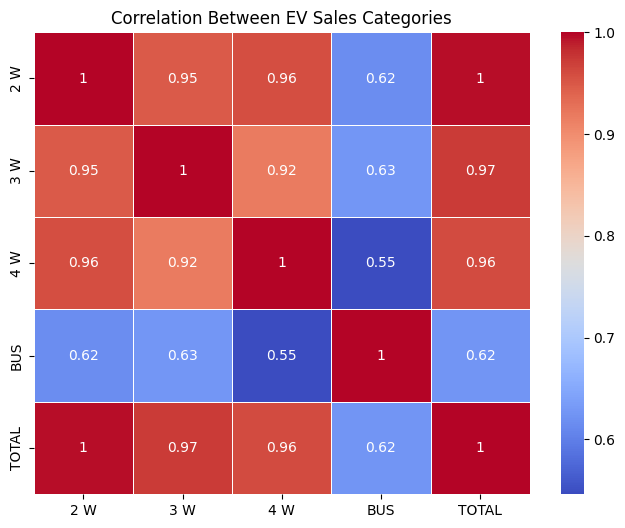

In [39]:
correlation = df[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between EV Sales Categories')
plt.show()